# <center>Big Data &ndash; Exercises &amp; Solution</center>
## <center>Fall 2023 &ndash; Week 4 &ndash; ETH Zurich</center>


## Agenda

1. Tips and interesting exercise questions
1. Q&A

## Introduction


#### Install Oxygen

This exercise will cover XML and JSON well-formedness.

For the next four weeks you will be using [oXygen 22.1](https://www.oxygenxml.com/xml_editor/download_oxygenxml_editor.html), an XML/JSON development IDE. Before starting, make sure oXygen is installed and working on your computer. You can download the required licence from the [ETH IT shop](https://itshop.ethz.ch/EndUser/Items/Home):

1. Login with your ETH credentials and go to **Software & Licenses** > **Order Software Product**.

<img src="img/step1.png" width=800/>

2. Look for "oxygen" and select the version that fits your local setup.

<img src="img/step2.png" width=800/>

3. Click **Next step** at the bottom, and accept the terms of services.

4. Wait until you get the confirmation email (it should take a couple of minutes). Follow the instructions, and download the __license file__: 

<img src="img/step3.png" width=800/>

## 1 XML

### Tips

|  |
| ------- |
| 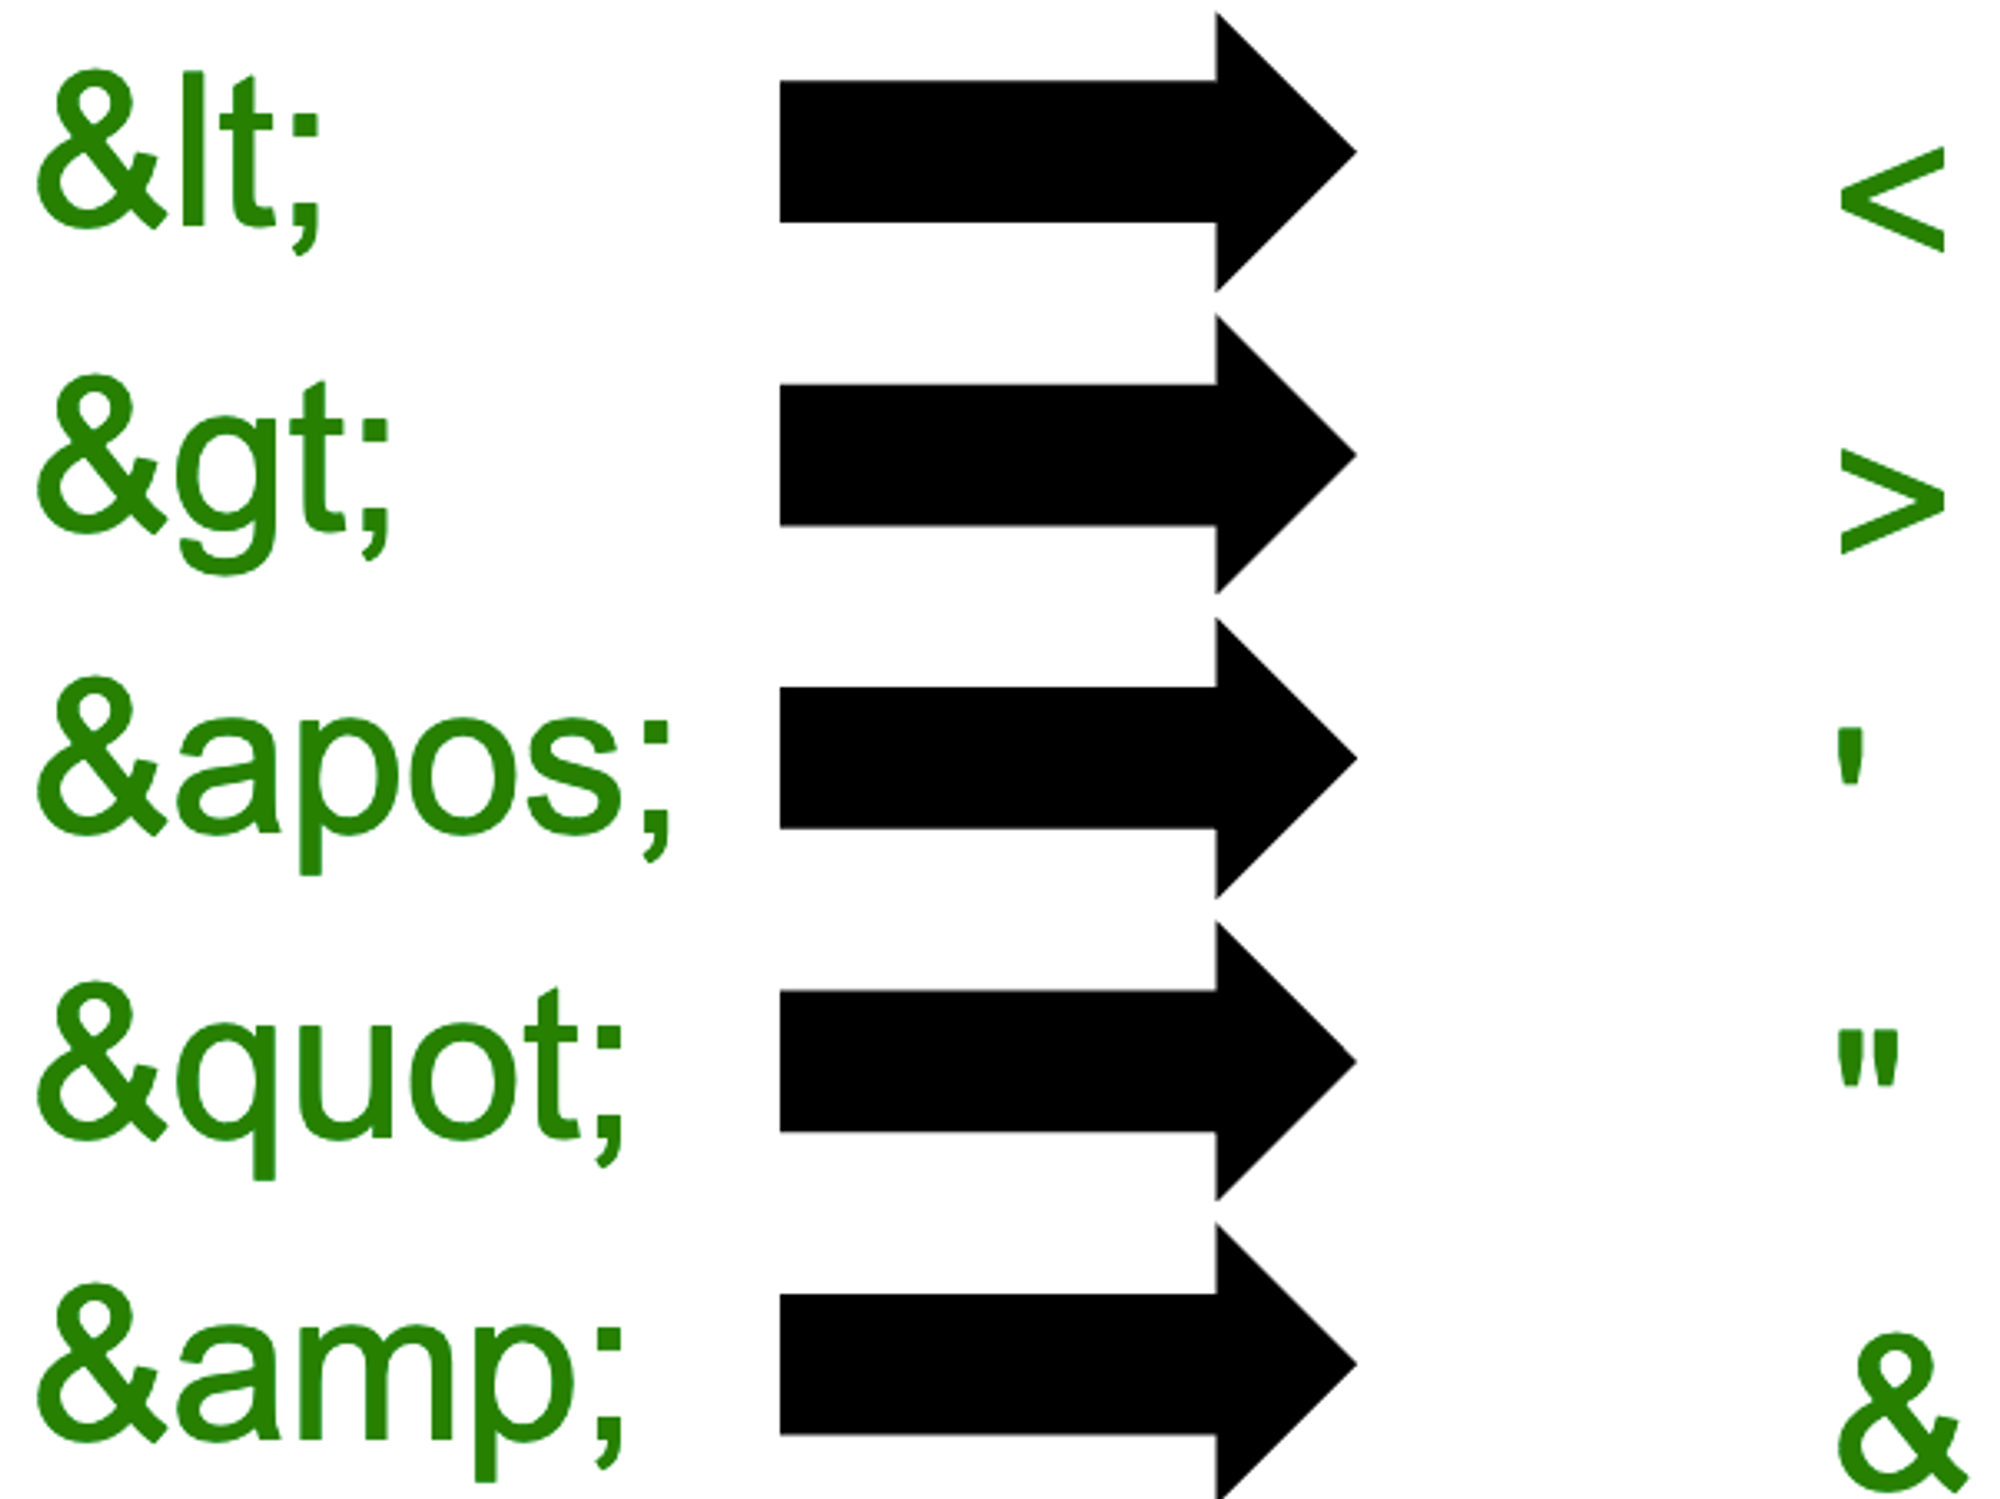 |
| 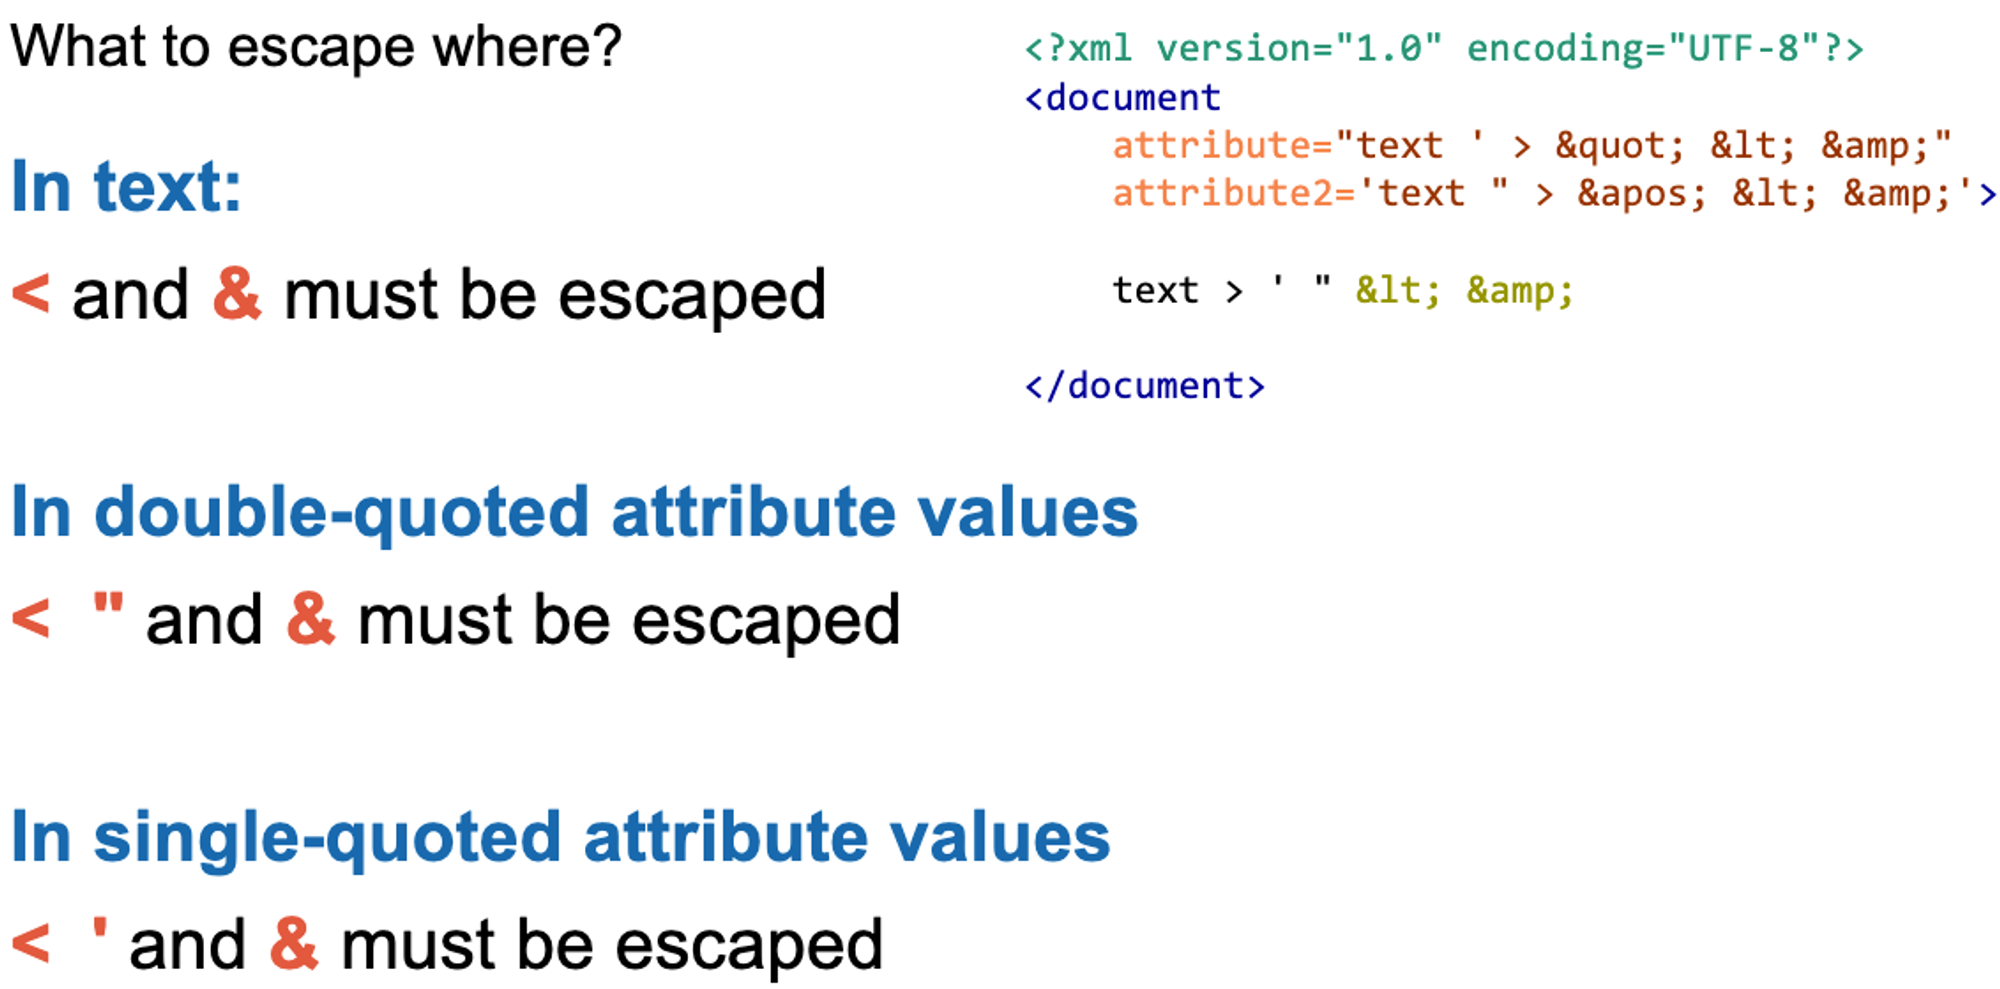 |
| 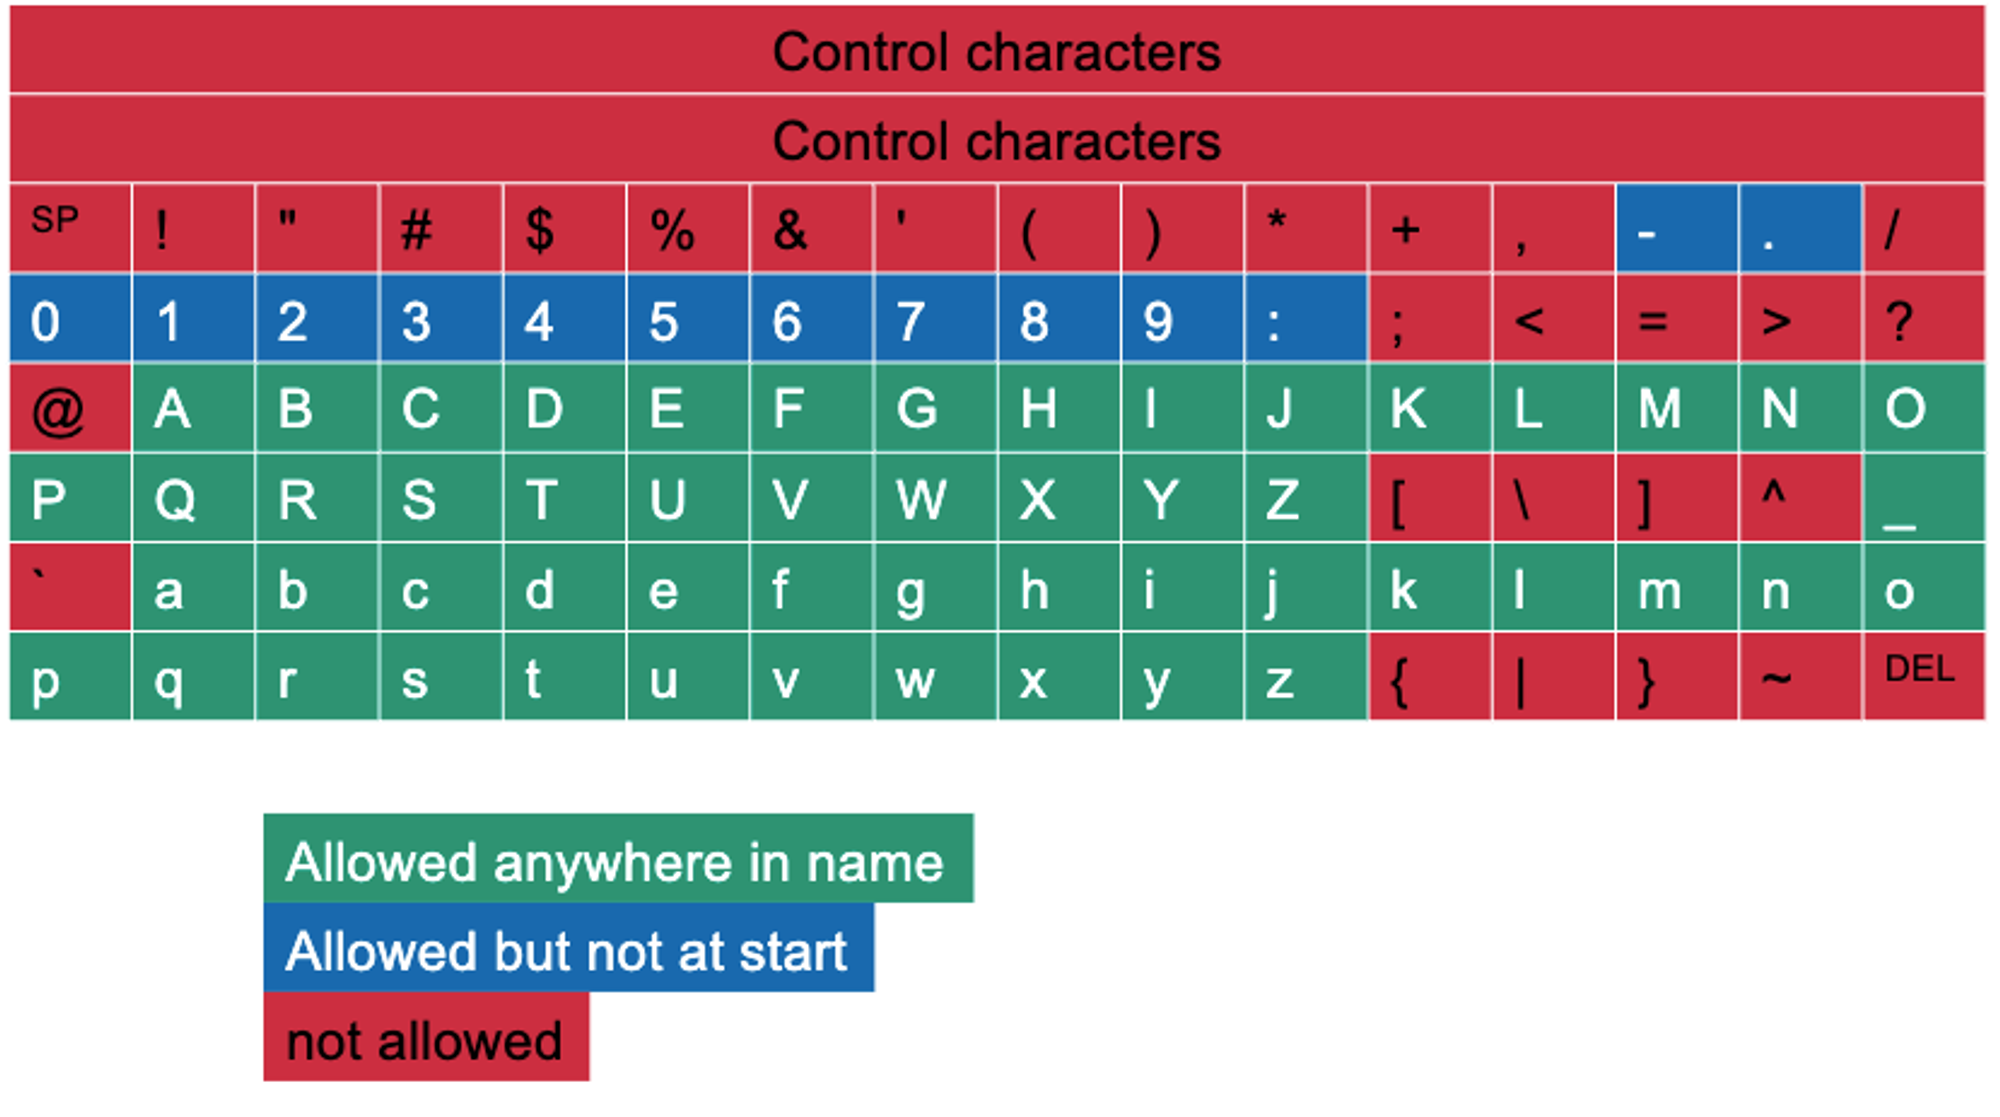 |
| 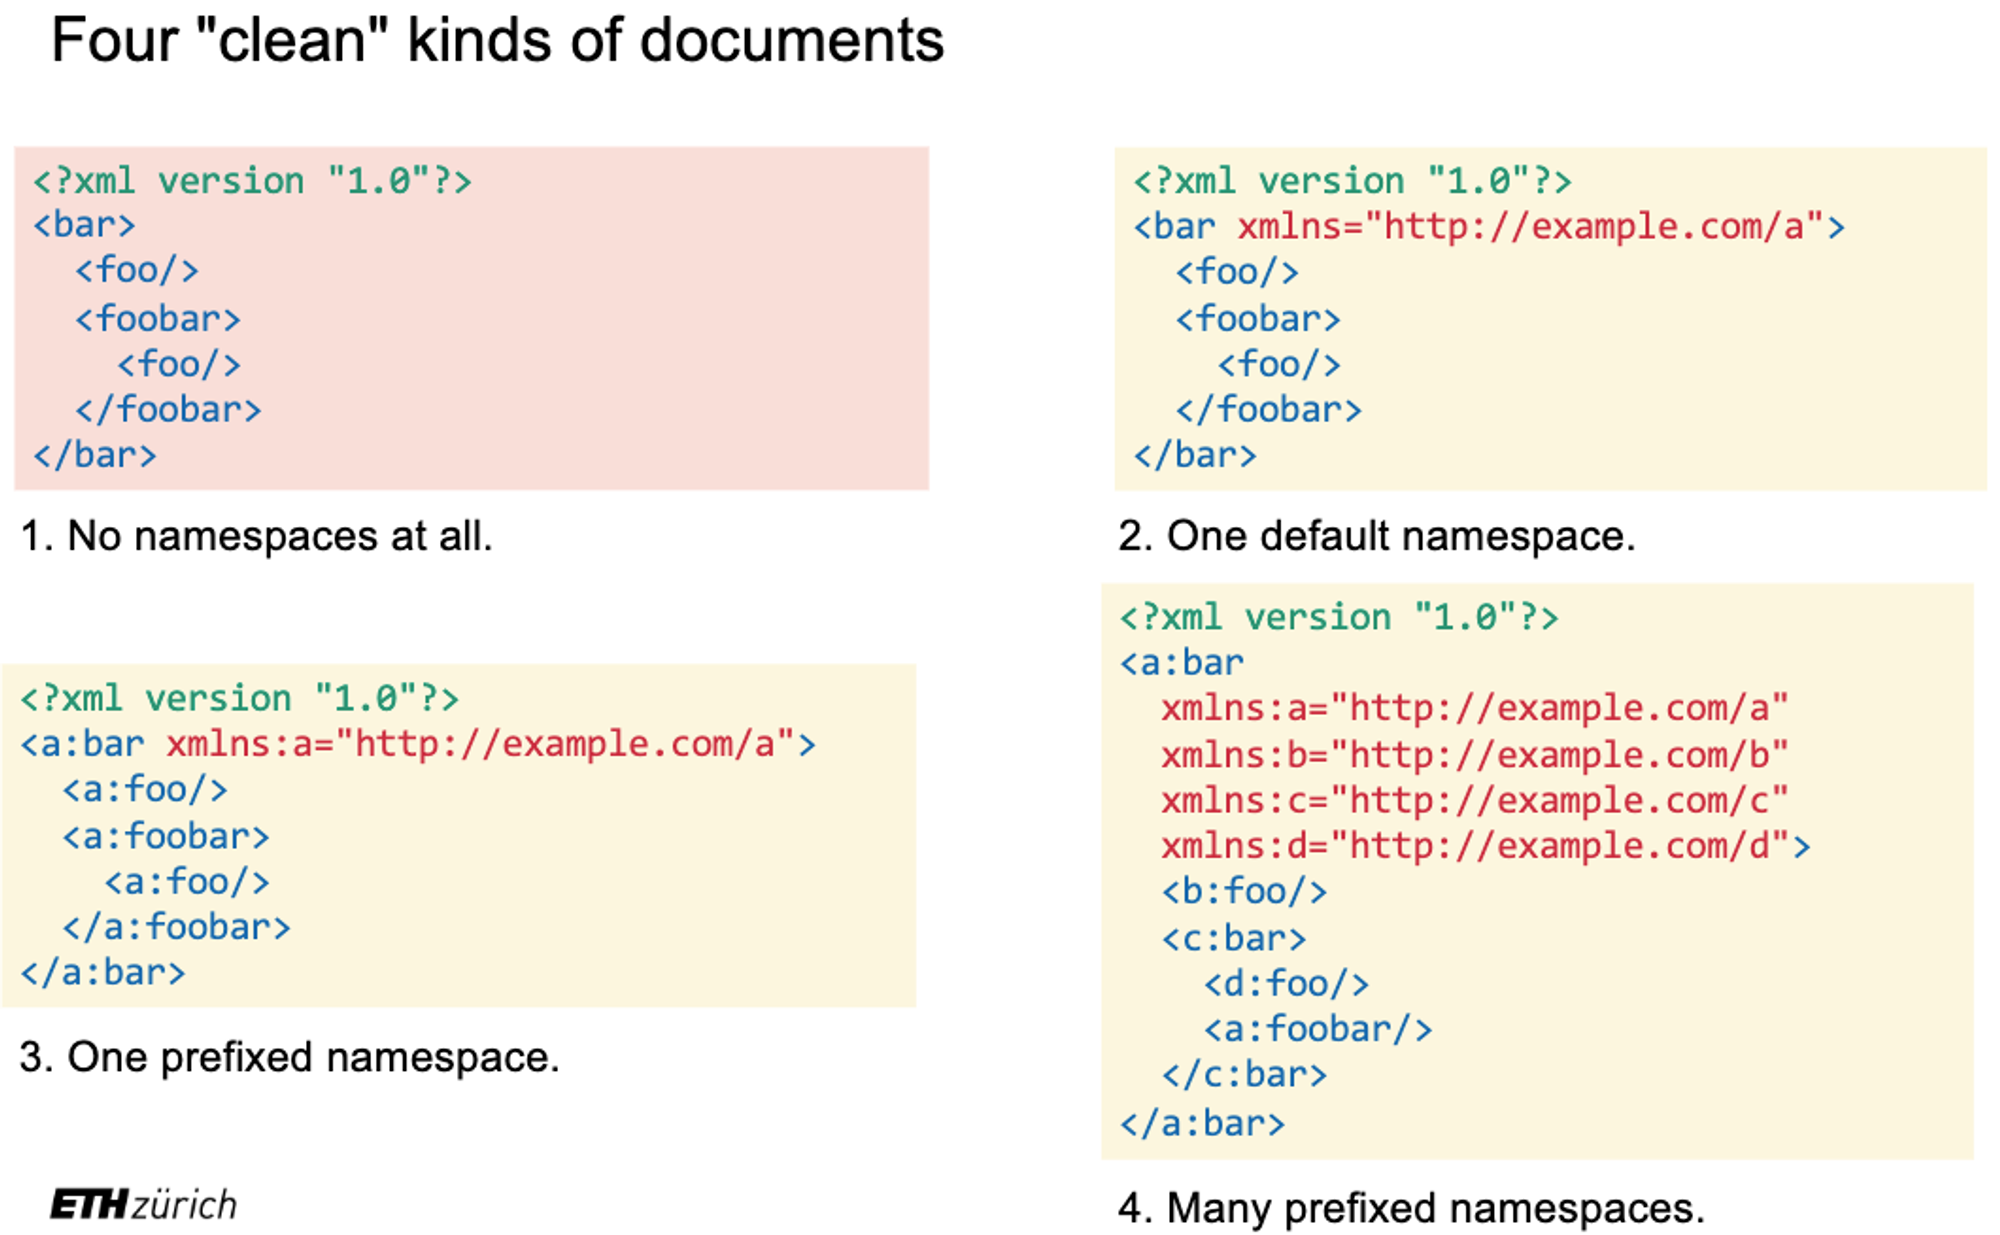 |


__Think of XML namespaces as modules or namespaces in programming__

* Python:

```python
#* `math`: full namespace (http://example.com/math)
#* `m`: prefix
import math as m 

#* `log2`: local name 
#* `math + m.log2`: QName
m.log2(4)
```

* Same goes for C++:

```cpp
#include <iostream>
 
namespace foo
{
    namespace bar
    {
         namespace baz
         {
             int value = 42;
         }
    }
}
 
namespace fbz = foo::bar::baz;
 
int main()
{
    //* Output: 42
    std::cout << fbz::value << '\n';
}
```

### 1.1 Well-formedness
Correct the following XML documents to be well-formed. Try first to "parse" it in mind, the use oXygen to check.


1.

```
<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE catalog>
<catalog>
    <!-- Start book list --to be defined -->
   <Book id=`bk101`>
      <author>Gambardella, Matthew</author>
      <title>XML Developer's Guide</title>
      <genre>Computer</genre>
      <price>44.95€</price>
      <publish_date version='hard' version='soft'>2000-10-01</publish_date>
      <_description lang=en>An `in-depth look` at creating applications 
      with XML <for dummies>.</_description>
      <xml_parse>true</xml_parse>
   </book>
</>
```


**Solution**

Document 1 has the following problems:
1. Comments `<!-- -->` cannot include the characters `--`;
1. The quotes in XML must always be simple quotes or double quotes, but not "Word-style" quotes (〝, 〞, \`, etc.);
1. Attribute `version` in `publish_date` is duplicated, this is forbidden;
1. The `lang` attribute should be quoted;
1. `<` must be escaped in text. Also it is suggested to use `&gt;` for the `>` symbol;
1. The `book` start tag does not correspond to the `Book` end tag;
1. The `catalog` tag is not closed correctly;
1. XML names beginning with xml are reserved by the W3C. Their usage should be avoided (except if it is as specified as the W3C, e.g. xml:space, xml:lang, xmlns...). **OxYgen does not show this as an error to be future-compatible, but this still is considered an error**.

Here is the corrected document:

```xml
<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE catalog [
<!ENTITY cright "&#169;">
]>
<catalog>
    <!-- Start book list - -to de defined -->
   <Book id='bk101'>
      <author>Gambardella, Matthew</author>
      <title>XML Developer's Guide</title>
      <genre>Computer</genre>
      <price>44.95€</price>
      <publish_date version='hard' version2='soft'>2000-10-01</publish_date>
      <_description lang='en'>An `in-depth look` at creating applications 
      with XML &lt;for dummies&gt;.</_description>
      <parse>true</parse>
   </Book>
</catalog>
```

__Tip__
* Escaping `>` (`&gt;`) is optional
* Specify the type of the code snippet in the exam

2.

```
<?xml version="1.0" encoding="utf-16"?>
<h:library xmlns:xdc="http://www.xml.com/books" xmlns:h="http://xml.com/library">
    <head><h:title>Book Review</title></head>
    <body/>
        <_xdc:bookreview>
            <xdc:title>XML: A Primer</xdc:title>
            <_table _style='container'>
                <h:tr align="#center">
                    <h:td>Author<h:span>St. Laurent & Tom Faron</h:td></h:span>
                </h:tr>
                <h:tr align="#left">
                    <h:td><xdc:author>Simon St. Laurent</xdc:author></h:td>
                    <h:td><xdc:price>31.98</xdc:price></h:td>
                    <h:td><xdc:#pages>352</xdc:#pages></h:td>
                    <h:td><xdc:_date>1998/01</xdc:_date></h:td>
                    <h:td><xdc:-comment>Love it</xdc:-comment></h:td>
                </h:tr>
            </_table>
        </_xdc:bookreview>
    </body>
</h:library>
```

**Solution**

Document 2 has the following problems:
1. `<h:title>` opening tag does not match the closing tag `</title>`;
1. In `<_xdc:_bookreview>` the namespace `_xdc` is not defined;
1. The `&` in the author text field should be escaped;
1. The `<h:span>` element containing the author name should be closed before closing its parent;
1. `<xdc:#pages>` is not a valid tag name;
1. `<xdc:-comment>` is not a valid tag name.
1. `body` uses an empty tag when opening tag is required instead;

Here is the corrected document:


```xml
<?xml version="1.0" encoding="utf-16"?>
<h:library xmlns:xdc="http://www.xml.com/books" xmlns:h="http://xml.com/library">
    <head><h:title>Book Review</h:title></head>
    <body>
    <xdc:bookreview>
        <xdc:title>XML: A Primer</xdc:title>
        <_table _style='container'>
            <h:tr align="#center">
                <h:td>Author<h:span>St. Laurent &amp; Tom Faron</h:span></h:td>
            </h:tr>
            <h:tr align="#left">
                <h:td><xdc:author>Simon St. Laurent</xdc:author></h:td>
                <h:td><xdc:price>31.98</xdc:price></h:td>
                <h:td><xdc:pages>352</xdc:pages></h:td>
                <h:td><xdc:_date>1998/01</xdc:_date></h:td>
                <h:td><xdc:comment>Love it</xdc:comment></h:td>
            </h:tr>
        </_table>
    </xdc:bookreview>
    </body>
</h:library>
```

### 1.2 XML Names
Which of the following are well-formed XML tags (i.e. which tag contain a conform XML name)? 
1. `<_bar/>`
1. `<123foo/>`
1. `<Foo/>`
1. `<foo 123>`
1. `<foo_123/>`
1. `<foo#123/>`
1. `<foo-123/>`
1. `<foo.123/>`
1. `<XmL_123/>`


**Solution**

1, 3, 5, 7, 8 are valid names. Remember:
1. Element names are case-sensitive.
1. Element names must start with a letter or underscore.
1. Element names cannot start with the letters xml (or XML, or Xml, etc).
1. Element names can contain letters, digits, hyphens, underscores, and periods.
1. Element names cannot contain spaces.

### 1.3 Predefined entities
XML has only 5 predefined entities. Connect each escape code to the corresponding value.
1. `&lt;` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     >
1. `&amp;`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           "
1. `&gt;` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     '
1. `&quot;` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                           &
1. `&apos;` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                           <

Which characters must always be escaped?

**Solution:**
1. `&lt;` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     <
1. `&amp;`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           &
1. `&gt;` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     >
1. `&quot;` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                           "
1. `&apos;` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                           '

& and < must always be escaped.

## 2. JSON

__Standards of a JSON object are different from what Python/JS defines as valid!!!__

### 2.1 Well-formedness
Correct the following JSON documents to be well-formed. Try first to "parse" them in mind, the use oXygen to check.

1. 


```
{
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": true,
  age: 25,
  "isRetired",
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100",
    'is verified' : "true"
  }
  'phoneNumbers': [
    {
      "type": [["home"]],
      "@number": "212 555-1234"
    },
    {
      "type": [["office"]],
      "@number": "646 555-4567"
    },
    {
      "type": [["mobile"[],
      "@number": "123 456-7890"
    }
  ],
  "children": [],
  "settings": {},
  "spouse": Null,
  "": ""
}
```

**Solution**
1. `age` name must be __double quoted__.
1. `isRetired` must have a value.
1. `is verified` and `phoneNumbers` should be double quoted.
1. `address` object must be followed by a comma.

1. The nested array in the `type` attribute of the last `phoneNumbers` is incorrectly balanced (`[["mobile"[]`).
1. `Null` is not a valid value (__`null`__ is valid).

*Best practices:*
- Using whitespaces and non-ascii characters for key names is allowed although not recommended. 

- Mixing proper boolean values and strings used as boolean values (ie. "true") is considered a bad practice.

Corrected document:

```json
{
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": true,
  "age": 25,
  "isRetired": false,
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100",
    "isVerified" : true
  },
  "phoneNumbers": [
    {
      "type": [["home"]],
      "@number": "212 555-1234"
    },
    {
      "type": [["office"]],
      "@number": "646 555-4567"
    },
    {
      "type": [["mobile"]],
      "@number": "123 456-7890"
    }
  ],
  "children": [],
  "settings": {},
  "spouse": null,
  "": ""
}
```

2.


```
[
    1: {
      "name": 'John'
      "lastname": 'Smith',
      "account": "jsmith"
      "phonenumbers" [{
           "type": "home",
           "1phone": 212-3242,
           "2phone": "545-4568"
       }]
    },
    2: {
      "name": "Jane"
      "lastname": 'Doe',
      "account": "jdoe"
      "phonenumbers" [
      {
           "type": "home",
           "phone": "8989 7685"
      },
      "phone": "545-4568"
      ],
      "account": "janedoe"
    }
]
```

**Solution:**
1. The document must start with `{`, not with `[`.
2. All strings must be double quoted.
3. Commas are missing after `"John"`, `"jsmith"`, `"Jane"` and `"jdoe"`
4. `:` are missing after `phonenumbers`.
5. `212-3242` is an invalid number, to include the dash it would need to be a string.
6. `"phone": "545-4568"` __can not be an element in an array__, it has to be part of an object (inside `{ }`).
7. Duplicated key `account` in the second element.

Corrected document:


```json
{
    "1": {
      "name": "John",
      "lastname": "Smith",
       "account": "jsmith",
       "phonenumbers": [{
           "type": "home",
           "1phone": "212-3242",
           "2phone": "545-4568"
       }]
    },
    "2": {
      "name": "Jane",
      "lastname": "Doe",
       "account": "jdoe",
       "phonenumbers": [
          {
              "type": "home",
              "phone": "8989 7685"
          },
          {
            "phone": "545-4568"
          }
       ]
    }   
}
```

### 2.2 JSON Key Names
Which of the following are well-formed JSON key names? 
1. `""`
1. `"123456"`
1. `"abcd"`
1. `"\"`
1. `"\\"`
1. `"""`
1. `"'"`


**Solution**

1, 2, 3, 5, 7 are valid key names. The only restriction the JSON syntax imposes on the key names is that " and \ must be escaped.

## 3 Conversions from a relational database

Messages from conversations between users are stored in a SQL table. Translate this table into XML and JSON.

|conversation_id | people | sender | content | timestamp | is_read | attachment_id|
|----------------|--------|--------|---------|-----------|---------|--------------|
|42|charlie,ari,jesse|charlie|hey, here's the doc ><|1510410193|TRUE|NULL|
|42|charlie,ari,jesse|charlie|NULL|1510410244|TRUE|doc_6492|
|42|charlie,ari,jesse|ari|thanks! \o/|1510432987|FALSE|NULL|
|17|rudy,sage|rudy|look at this cute "bat-cat"! 😻|1500897189|TRUE|img_91847|
|17|rudy,sage|NULL|aww ♥|1506610190|TRUE|NULL|
    
    
**Solution**

There are, of course, many possible solutions.

JSON:

```json
[
    {
        "conversation_id": 42,
        "people": ["charlie", "ari", "jesse"],
        "messages": [
            {
                "sender": "charlie",
                "content": "hey, here's the doc ><",
                "timestamp": 1510410193,
                "is_read": true
            },
            {
                "sender": "charlie",
                "timestamp": 1510410244,
                "is_read": true,
                "attachment_id": "doc_6492"
            },
            {
                "sender": "ari",
                "content": "thanks! \\o/",
                "timestamp": 1510432987,
                "is_read": false
            }
        ]
    },
    {
        "conversation_id": 17,
        "people": ["rudy", "sage"],
        "messages": [
            {
                "sender": "rudy",
                "content": "look at this cute \"bat-cat\"! 😻",
                "timestamp": 1500897189,
                "is_read": true,
                "attachment_id": "img_91847"
            },
            {
                "content": "aww ♥",
                "timestamp": 1506610190,
                "is_read": true
            }
        ]
    }
]

```

XML:

```xml
<?xml version="1.0" encoding="UTF-8" ?>
<conversations>
    <conversation id="42">
        <people>
            <person>charlie</person>
            <person>ari</person>
            <person>jesse</person>
        </people>
        <messages>
            <message>
                <sender>charlie</sender>
                <content>hey, here's the doc &gt;&lt;</content>
                <timestamp>1510410193</timestamp>
                <is_read>true</is_read>
            </message>
            <message>
                <sender>charlie</sender>
                <timestamp>1510410244</timestamp>
                <is_read>true</is_read>
                <attachment_id>doc_6492</attachment_id>
            </message>
            <message>
                <sender>ari</sender>
                <content>thanks! \o/</content>
                <timestamp>1510432987</timestamp>
                <is_read>false</is_read>
            </message>
        </messages>
    </conversation>
    <conversation id="17">
        <people>
            <person>rudy</person>
            <person>sage</person>
        </people>
        <messages>
            <message>
                <sender>rudy</sender>
                <content>look at this cute &quot;bat-cat&quot;! 😻</content>
                <timestamp>1500897189</timestamp>
                <is_read>true</is_read>
                <attachment_id>img_91847</attachment_id>
            </message>
            <message>
                <content>aww ♥</content>
                <timestamp>1506610190</timestamp>
                <is_read>true</is_read>
            </message>
        </messages>
    </conversation>
</conversations>
```

It's important to not have tags for NULL values, otherwise the value is interpreted as the empty string. In practice, one could define a schema with a specification of the type of each value, transform timestamps into `xs:datetime`, etc.

## 4 More XML
### 4.1 XML Namespaces

1. Is the following XML file well-formed?
1. What are the namespaces of each attribute and each element?
1. What's wrong with this file? Fix it so it is well-formed, follows best practices, and each element uses the correct namespace.

```xml
<?xml version="1.0" encoding="UTF-8"?>
<foo
xmlns="http://xmlrepo.test/foo.xml"
xmlns:foo="http://xmlrepo.test/foo.xml"
xmlns:math="http://xmlrepo.test/math.xml">
    <bar:baz xmlns:bar="http://xmlrepo.test/bar.xml" bar:attr="some attribute" lalala="some other attribute">
        <svg xmlns="http://xmlrepo.test/svg.xml">
            <textbox>
                <math:msup>42</math:msup>
                <foo:plus/>
                <math:msub>17</math:msub>
            </textbox>
            <foo_value id="748">some value</foo_value>
        </svg>
        <svg xmlns:svg="http://xmlrepo.test/svg.xml">
            <svg:textbox>
                <math:msup>42</math:msup>
                <foo:plus/>
                <msub>17</msub>
            </svg:textbox>
            <bar_value id="867">some other value</bar_value>
        </svg>
        <math:othermath/>
    </bar:baz>
</foo>

```

**Solution**

1. The document is weird and is full of "obvious" mistakes (see answer to question 3), but it is technically well-formed.
2. 
  - `foo` is in namespace `foo`. 
  - The first `<svg>` tag, and its elements `textbox` and `foo_value` are in namespace `svg`. 
  - The second `<svg>` tag, and its elements `msub` and `bar_value` are in namespace `foo`. 
  - Prefixed elements and attributes are in the corresponding namespaces. 
  - Nonprefixed attributes (`lalala` and `id`) are in __no namespace__.
      - __A tag without a prefix is under the default namespace (if there is any).__

<br>

3. Let's __declare everything in the root__, __not using any default namespace at all__ (although leaving `foo` as the default namespace could be reasonable), and prefix everything.
    
    *Note:* It is considered best practice to have everything inside a namespace, including the attributes. However, `lalala` and `id` were originally in no namespace, so in this example we randomly move them to a namespace.   

```xml
<?xml version="1.0" encoding="UTF-8"?>
<foo:foo
    xmlns:foo="http://xmlrepo.test/foo.xml"
    xmlns:bar="http://xmlrepo.test/bar.xml"
    xmlns:svg="http://xmlrepo.test/svg.xml"
    xmlns:math="http://xmlrepo.test/math.xml">
    <bar:baz bar:attr="some attribute" bar:lalala="some other attribute">
        <svg:svg>
            <svg:textbox>
                <math:msup>42</math:msup>
                <foo:plus/>
                <math:msub>17</math:msub>
            </svg:textbox>
            <svg:foo_value svg:id="748">some value</svg:foo_value>
        </svg:svg>
        <foo:svg>
            <svg:textbox>
                <math:msup>42</math:msup>
                <foo:plus/>
                <foo:msub>17</foo:msub>
            </svg:textbox>
            <foo:bar_value foo:id="867">some other value</foo:bar_value>
        </foo:svg>
        <math:othermath/>
    </bar:baz>
</foo:foo>
```


## 5. From XML to JSON - back to the REST API request result from previous exercise sessions.
In this exercise you are asked to translate the following XML document into a JSON document. 
Remember the REST API call we used during the tutorial about Azure Blob Storage. The result was an XML file. Below you can find the result of the request (with some elements removed for simplicity and a second fake blob added to the response). Now that you can parse it, transform it as a JSON file. 
```xml 
<EnumerationResults ContainerName="https://melaniestorage.blob.core.windows.net/exercise02">
    <Blobs>
        <Blob>
            <Name>picture</Name>
            <Url>https://melaniestorage.blob.core.windows.net/exercise02/picture</Url>
            <Properties>
                <Last-Modified>Wed, 03 Oct 2018 07:22:16 GMT</Last-Modified>
                <Content-Length>136356</Content-Length>
                <Content-Encoding />
                <BlobType>BlockBlob</BlobType>
            </Properties>
        </Blob>
        <Blob>
            <Name>music</Name>
            <Url>https://melaniestorage.blob.core.windows.net/exercise02/music</Url>
            <Properties>
                <Last-Modified>Wed, 03 Oct 2018 07:23:16 GMT</Last-Modified>
                <Content-Length>222222</Content-Length>
                <Content-Encoding />
                <BlobType>BlockBlob</BlobType>
            </Properties>
        </Blob>
    </Blobs>
</EnumerationResults>
```
**Solution**
```json
{"EnumerationResults": 
    {"ContainerName": "https://melaniestorage.blob.core.windows.net/exercise02", 
            "Blobs": 
            [{"Blob": {"Name": "picture", 
                       "Url": "https://melaniestorage.blob.core.windows.net/exercise02/picture", 
                       "Properties": 
                                {"Last-Modified": "Wed, 03 Oct 2018 07:22:16 GMT", 
                                "Content-Length": 136356, 
                                "Content-Encoding": null, 
                                "BlobType": "BlockBlob"}
                        }
                },
                {"Blob": {"Name": "music", 
                          "Url": "https://melaniestorage.blob.core.windows.net/exercise02/music", 
                          "Properties": 
                                {"Last-Modified": "Wed, 03 Oct 2018 07:23:16 GMT", 
                                "Content-Length": 222222, 
                                "Content-Encoding": null, 
                                "BlobType": "BlockBlob"}
                         }
                 }]
    }
} 
```

## 6. JSON to XML - exploring an open API
In this exercise you can use any open API that answers with a JSON. One such API is: [the Star Wars API](https://swapi.dev/). Below you can find an (slightly modified) example of the response to the request: https://swapi.dev/api/people/1/. Parse it and transform it to XML.

```json
{
  "name": "Luke Skywalker",
  "height": "172",
  "mass": "77",
  "homeworld": "http://swapi.dev/api/planets/1/",
  "films": [
    "http://swapi.dev/api/films/1/",
    "http://swapi.dev/api/films/2/",
    "http://swapi.dev/api/films/3/",
    "http://swapi.dev/api/films/6/"
  ],
  "starships": [],
  "vehicles": [
    "http://swapi.dev/api/vehicles/14/",
    "http://swapi.dev/api/vehicles/30/"
  ]
}
```

**Solution:** 

```xml
<?xml version="1.0" encoding="UTF-8"?>
<document>
    <name>Luke Skywalker</name>
    <height>172</height>
    <mass>77</mass>
    <homeworld>http://swapi.dev/api/planets/1/</homeworld>
    <films>
        <film>http://swapi.dev/api/films/1/</film>
        <film>http://swapi.dev/api/films/2/</film>
        <film>http://swapi.dev/api/films/3/</film>
        <film>http://swapi.dev/api/films/6/</film>
    </films>
    <starships>
        <starship></starship>
    </starships>
    <vehicles>
        <vehicle>http://swapi.dev/api/vehicles/14/</vehicle>
        <vehicle>http://swapi.dev/api/vehicles/30/</vehicle>
    </vehicles>
</document>
```

## 7. XML vs CSV - the limits of tables for heterogeneous data
If your document consists of a collection of heterogeneous objects with different attributes, XML/JSON turns out to be more suited than a comma-separated format to store the data. In this exercise __we want to show that denormalization is a good idea in this setting__. 

You are given the following XML document representing a collection of products available in an online shop selling all kinds of products. In this product catalog each product has different attributes. You are asked to turn this data into a CSV file.
```xml
<productscatalog>
    <product>
        <id> 1 </id>
        <category> BBQ </category>
        <type> Gas </type>
        <height> 120cm </height>
    </product>
    <product>
        <id> 2 </id>
        <category> notebook </category>
        <brand> Apple </brand>
        <specs>
             <RAM> 16Gb </RAM>
            <storage> 128Gb </storage>
        </specs>
    </product>
    <product>
        <id> 3 </id>
        <category> shoes </category>
        <size> 39 </size>
        <model> Heels </model>
    </product>
</productscatalog>
```    

1. Write the documents in a CSV format (i.e. in a table).

**Solution:**

```
id, category, type, height, brand, specs:RAM, specs:storage, size, model
1, BBQ, Gas, 120cm,,,,,
2, notebook,,,Apple,16Gb,128Gb,,
3,shoes,,,,,,39, Heels
```

This solution is not unique. 

You could for example also store it in the following way:
```
id, AttributeName, AttributeValue
1, category, BBQ
1, type, Gas
1, height, 120cm
2, category, notebook
2, brand, Apple
2, specs:RAM, 16Gb
2, specs:storage, 128Gb
3, category, shoes
3, size, 39
3, model, Heels
```


2. What are the disadvantages of the CSV format compared to the XML format in this case?


**Solution:**

For the first solution:
We have different attributes for each category of products, so most of the columns in the table are empty. The resulting table is extremely sparse and not easily humanly readable. 

For the second solution: 
It is not convenient to read with several lines for the same product. You have to store the id multiple times. And you need to make sure the table is sorted by id if you want to see all the attributes for one product as a group.

Other problem: if we have a lot of nested attributes it can be cumbersome to put them in the table. 


3. Give an example of one use case where the CSV format would be more appropriate than the XML format.

**Solution:**

If all the rows have the same (fixed set) of attributes and there is no nesting, it is more natural to describe the data as a table.

### Tips
Think of it as the functions in pandas: `melt() -> pivot()`

In [1]:
import pandas as pd

d1 = {"Name": ["Pankaj", "Lisa", "David"], "ID": [1, 2, 3], "Role": ["CEO", "Editor", "Author"]}
df = pd.DataFrame(d1)
df

,Name,ID,Role
0,Pankaj,1,CEO
1,Lisa,2,Editor
2,David,3,Author


In [2]:
df_melted = pd.melt(df, id_vars=["ID"], value_vars=["Name", "Role"], var_name="AttributeName", value_name="AttributeValue")
df_melted

,ID,AttributeName,AttributeValue
0,1,Name,Pankaj
1,2,Name,Lisa
2,3,Name,David
3,1,Role,CEO
4,2,Role,Editor
5,3,Role,Author


In [3]:
df_pivot = df_melted.pivot(index='ID', columns='AttributeName')
df_pivot

AttributeValue        
AttributeName           Name    Role
ID                                  
1                     Pankaj     CEO
2                       Lisa  Editor
3                      David  Author